In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in training data
original_train = pd.read_csv('train.csv')
#view the first 10 rows of the data
original_train.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [2]:
#suppress warnings for presentation purposes
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load in testing data
original_test = pd.read_csv('test.csv')
original_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


# Exploratory Data Analysis (Mainly Done in Linear Regression Notebook)

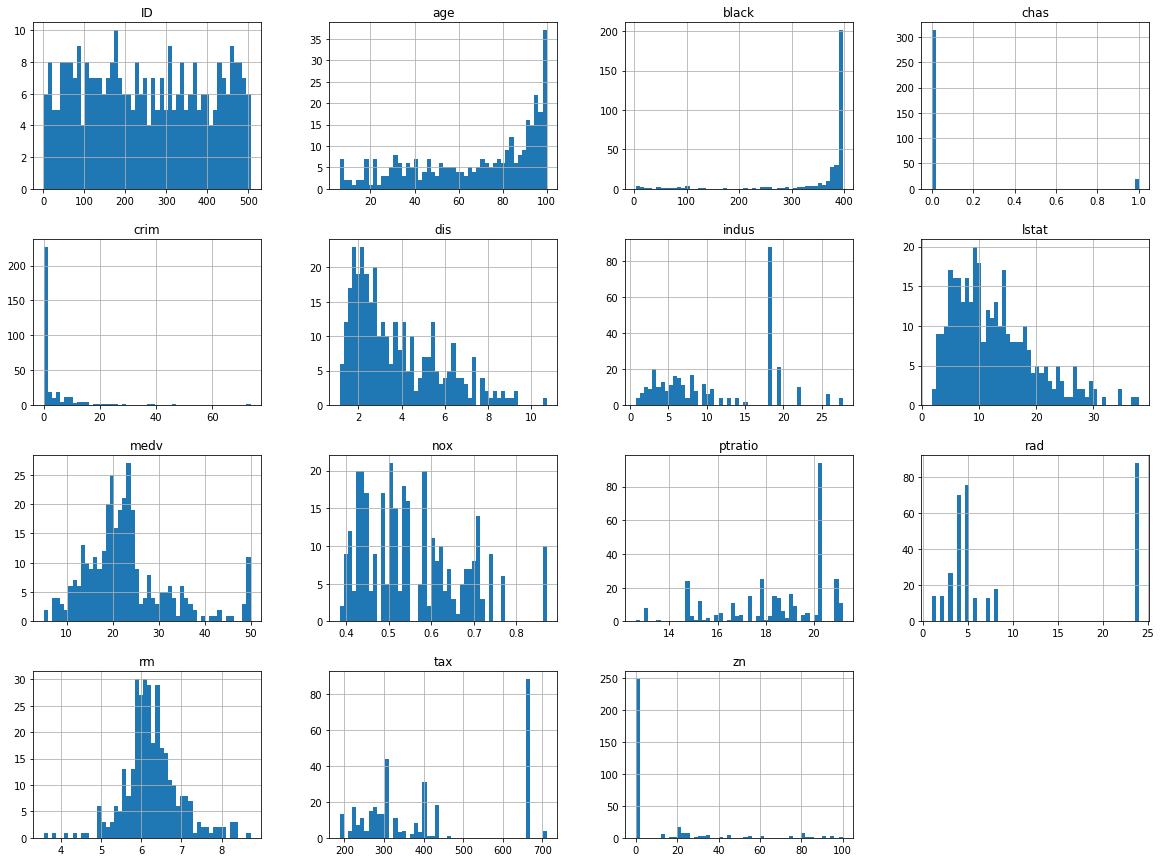

In [4]:
original_train.hist(bins = 50, figsize = (20,15))
plt.show()

In [5]:
#check if there are any overlapping IDs
len(set(original_train['ID']))

333

In [6]:
#check if there are any null values in dataframe
original_train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
#check how many times the correlations are greater than 0.7 (at least one for every column)
(original_train.corr() > 0.7).sum()

ID         2
crim       1
zn         1
indus      3
chas       1
nox        3
rm         1
age        2
dis        1
rad        3
tax        3
ptratio    1
black      1
lstat      1
medv       1
dtype: int64

In [8]:
#check how many times the correlations are less than -0.7
(original_train.corr() < -0.7).sum()

ID         0
crim       0
zn         0
indus      1
chas       0
nox        1
rm         0
age        1
dis        3
rad        0
tax        0
ptratio    0
black      0
lstat      1
medv       1
dtype: int64

In [9]:
# Calculate first and third quartile
rad_first_quart = original_train['rad'].describe()['25%']
print(rad_first_quart)
rad_third_quart = original_train['rad'].describe()['75%']
print(rad_third_quart)
tax_first_quart = original_train['tax'].describe()['25%']
print(tax_first_quart)
tax_third_quart = original_train['tax'].describe()['75%']
print(tax_third_quart)

4.0
24.0
279.0
666.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2283f160>,
      dtype=object)

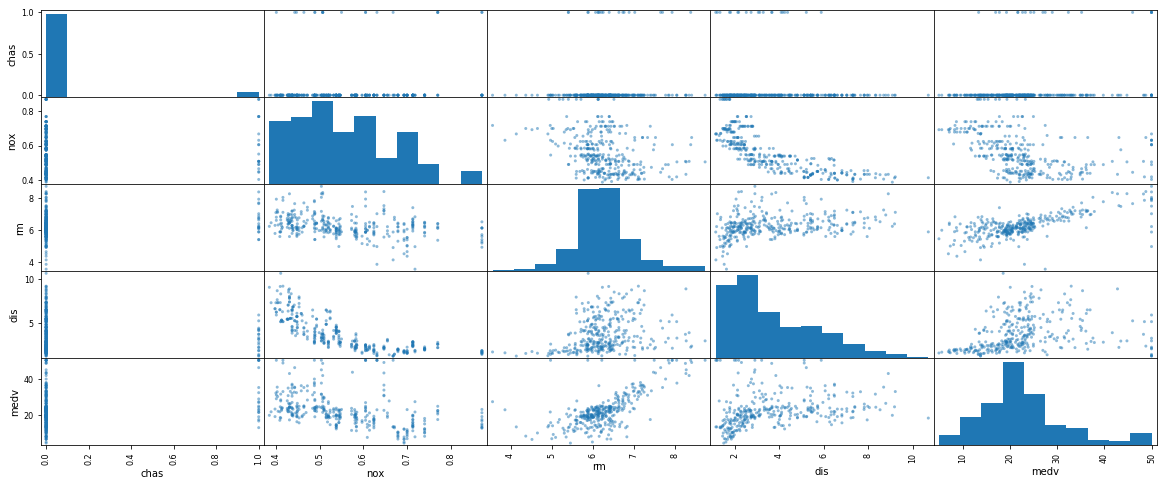

In [10]:
from pandas.plotting import scatter_matrix
columns = ['chas','nox','rm','dis','medv']
scatter_matrix(original_train[columns], figsize=(20,8))

In [11]:
#describing the data
original_train.describe()
#crim, zn, indus, age, dis, lstat, black have outliers

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [12]:
X_train = original_train.drop(['ID','medv'],axis = 1)
Y_train = original_train['medv']

# Default Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()

#Evaluates the negative mean squared error score by cross-validation
scores = cross_val_score(tree_reg, original_train.drop(['ID','medv'], axis = 1),
                         original_train['medv'],scoring = 'neg_mean_squared_error',cv = 10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[ 3.94077478  3.24177693  4.56131431  6.33979734  4.33526763  5.50724041
  3.7976069  10.43939218  7.46403498  3.89261149]
5.3519816961525475
2.0974168262276653


In [17]:
#fits the decision tree model
forest = tree_reg.fit(original_train.drop(['ID','medv'], axis = 1) ,original_train['medv'])

#predicts the decision tree model
forest_predict = forest.predict(original_test.drop(['ID'], axis = 1))

forest_predicts = np.reshape(forest_predict, (-1, 1))
forest_predicts.shape

(173, 1)

In [18]:
#create a Dataframe from a np.ndarray
forest_pred = pd.DataFrame({'medv': forest_predicts[:,0]})
#join the two dataframes for submission
forest_final = pd.concat([original_test['ID'], forest_pred], axis=1)
forest_final.head()

forest_final.to_csv('ForestReg.csv', index = False)
#Score was 4.27900

# Random Forest Regression
Don't need to scale features since numerical and precision issues are not too important for random forest regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#get the possible random forest parameters
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Default Random Forest

In [20]:
from sklearn.model_selection import cross_val_score

#Evaluates the mean squared error regression loss score by cross-validation
scores = cross_val_score(rf, X_train, Y_train,scoring = 'neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[2.68611993 3.88931276 3.7539098  7.25706636 5.17418519]
4.552118809317605
1.5660210158589691


In [21]:
#fits the default random forest model
rf_orig = rf.fit(X_train,Y_train)

#predicts using default random forest model
rf_orig_predict = rf_orig.predict(original_test.drop(['ID'], axis = 1))

rf_orig_predicts = np.reshape(rf_orig_predict, (-1, 1))
rf_orig_predicts.shape

(173, 1)

In [22]:
#create a Dataframe from a np.ndarray
rf_orig_rand_pred_df = pd.DataFrame({'medv': rf_orig_predicts[:,0]})
#join the two dataframe for for submission
rf_orig_rand_final = pd.concat([original_test['ID'], rf_orig_rand_pred_df], axis=1)
rf_orig_rand_final.head()

,ID,medv
0,3,32.79
1,6,23.44
2,8,16.34
3,9,15.52
4,10,18.12


In [23]:
#export to csv for Kaggle submission
rf_orig_rand_final.to_csv('RFOrig.csv', index = False)
#Score was 4.07978 (49 out of 75)

# Random Forest with Randomized Search

In [24]:
#performing a Randomized Sarch
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [30]:
#Random search of parameters using 5 fold cross validation; search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, scoring = 'neg_mean_squared_error', random_state=0, n_jobs = 3)

In [31]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

#Fit the random search model
rf_random.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 4.11 s, sys: 125 ms, total: 4.24 s
Wall time: 3min 2s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=3,
          param_distributions={'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [32]:
#find the combination with the best parameters
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [33]:
#find the combination with the best score
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
#equivalent to root mean squared error for best GridSearch score
print(rf_random.best_score_)

-22.016847369724545


In [35]:
#actual root mean squared error for best GridSearch score
print(np.sqrt(-rf_random.best_score_))

4.6922113517748265


In [36]:
#printing out the importance for each feature
feature_rand_importances = rf_random.best_estimator_.feature_importances_
print(sorted(zip(feature_rand_importances,X_train),reverse=True))

[(0.48419339303482367, 'rm'), (0.3614261981341379, 'lstat'), (0.06274216030208847, 'dis'), (0.03385547465543985, 'crim'), (0.012364374167891991, 'age'), (0.010791458040807323, 'nox'), (0.009027981622140285, 'tax'), (0.008273464934937842, 'ptratio'), (0.007539005453566165, 'black'), (0.004982082908816658, 'rad'), (0.0036044480470757653, 'indus'), (0.0006354679574272845, 'chas'), (0.0005644907408468606, 'zn')]


In [37]:
#predict using random forest model
rf_rand_pred = rf_random.predict(original_test.drop(['ID'], axis = 1))
rf_rand_predict = np.reshape(rf_rand_pred, (-1, 1))
rf_rand_predict.shape

(173, 1)

In [38]:
#create a Dataframe from a np.ndarray
rf_rand_pred_df = pd.DataFrame({'medv': rf_rand_predict[:,0]})
#join the two dataframes for submission
rf_rand_final = pd.concat([original_test['ID'], rf_rand_pred_df], axis=1)
rf_rand_final.head()

,ID,medv
0,3,34.540438
1,6,25.406284
2,8,16.471935
3,9,15.482683
4,10,18.024548


In [39]:
#export to csv for Kaggle submission
rf_rand_final.to_csv('RFRandSearch.csv', index = False)
#Score was 3.76604 (29 out of 75)

# Random Forest Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [100, 200, 231, 300, 400, 600]
# Maximum number of levels in tree
max_depth = [10,20,35,50,75,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,5,6,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3,4]
# Create the random grid
grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators': n_estimators}

In [41]:
#Grid search of parameters using 5 fold cross validation
rf_gridsearch = GridSearchCV(estimator = rf, param_grid = grid, 
                               cv = 5, scoring = 'neg_mean_squared_error', n_jobs = 3)

In [42]:
%%time
# Fit the grid search model
rf_gridsearch.fit(X_train, Y_train)

CPU times: user 12.3 s, sys: 728 ms, total: 13.1 s
Wall time: 9min 19s


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'max_depth': [10, 20, 35, 50, 75, 100, None], 'min_samples_split': [2, 4, 5, 6, 8], 'min_samples_leaf': [1, 2, 3, 4], 'n_estimators': [100, 200, 231, 300, 400, 600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
#best parameters to use based on GridSearch
rf_gridsearch.best_params_

{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [44]:
#best score found using GridSearch for negative mean squared error
rf_gridsearch.best_score_

-21.506980949062203

In [45]:
#equivalent root mean squared error for best GridSearch score
print(np.sqrt(-rf_gridsearch.best_score_))

4.637561961749104


In [46]:
#printing out the importance for each feature
feature_importances = rf_gridsearch.best_estimator_.feature_importances_
print(sorted(zip(feature_importances,X_train),reverse=True))

[(0.4456111845887821, 'rm'), (0.39517664497180793, 'lstat'), (0.06652694914364116, 'dis'), (0.03417718902506281, 'crim'), (0.01416490771883963, 'age'), (0.010688270489551639, 'nox'), (0.00969920855516872, 'tax'), (0.0072209306165411935, 'ptratio'), (0.0070260981797272805, 'black'), (0.004916482896045243, 'rad'), (0.0036821756701723002, 'indus'), (0.0007141787610622144, 'zn'), (0.0003957793835977405, 'chas')]


In [47]:
#predictions using the random forest model
rf_predict = rf_gridsearch.predict(original_test.drop(['ID'], axis = 1))
rf_predicts = np.reshape(rf_predict, (-1, 1))
rf_predicts.shape

(173, 1)

In [48]:
#create a Dataframe from a np.ndarray
rf_pred = pd.DataFrame({'medv': rf_predicts[:,0]})
#join to make a final for submission
rf_final = pd.concat([original_test['ID'], rf_pred], axis=1)
rf_final.head()

,ID,medv
0,3,34.783200
1,6,25.092293
2,8,15.776327
3,9,15.029809
4,10,18.103450


In [49]:
#export to csv for Kaggle submission
rf_final.to_csv('RFGridSearch.csv', index = False)
#Score was 3.85356 (35 out of 75)